**Recommendation System - Breast Cancer**

**Objectives **
To predict breast cancer using K Fold 

## Loading the Dataset

In [ ]:
%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
breast_cancer = load_breast_cancer()

### Displaying the Description

In [ ]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Checking the Sample and Target Sizes

In [ ]:
breast_cancer.target[::10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
breast_cancer.data.shape

(569, 30)

In [ ]:
breast_cancer.target.shape

(569,)

## Splitting the Data for Training and Testing 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     breast_cancer.data, breast_cancer.target, random_state=11)

### Training and Testing Set Sizes

In [ ]:
X_train.shape

(426, 30)

In [ ]:
X_test.shape

(143, 30)

## Creating the Model 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

## Training the Model 

In [ ]:
nb.fit(X=X_train, y=y_train)

GaussianNB()

## Predicting  

In [ ]:
predicted = nb.predict(X=X_test)

In [ ]:
expected = y_test

In [ ]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [ ]:
wrong

[(1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]

### Estimator Method `score`

In [ ]:
print(f'{nb.score(X_test, y_test):.2%}')

95.10%


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [ ]:
confusion

array([[44,  6],
       [ 1, 92]])

### Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
print(classification_report(expected, predicted, 
       target_names=breast_cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



### Visualizing the Confusion Matrix

In [ ]:
import pandas as pd

In [ ]:
confusion_df = pd.DataFrame(confusion, index=range(2),
     columns=range(2))

In [ ]:
import seaborn as sns

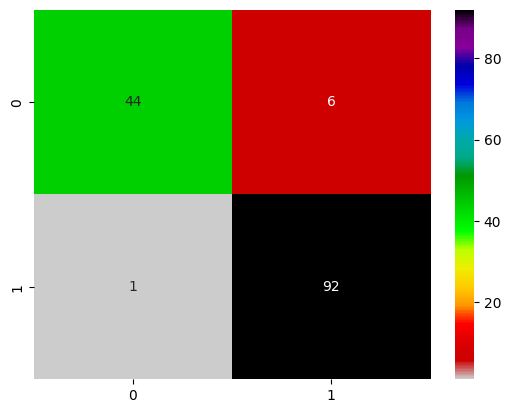

In [ ]:
axes = sns.heatmap(confusion_df, annot=True, 
                    cmap='nipy_spectral_r')

## K-Fold Cross-Validation
### KFold Class

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

### Using the `KFold` Object with Function `cross_val_score` 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(estimator=nb, X=breast_cancer.data, 
     y=breast_cancer.target, cv=kfold)

In [ ]:
scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 93.85%


In [ ]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 2.75%


## Running Multiple Models to Find the Best One 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

In [ ]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
     print(f'{estimator_name:>20}: ' + 
           f'mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%


In [ ]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################